In [6]:
## Importing Libraries

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [8]:
# Data Preprocessing
# Training Image Preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7392 files belonging to 5 classes.


In [9]:
# Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2160 files belonging to 5 classes.


In [10]:
# Define MobileNetV3 architecture
def create_mobilenetv3_model(input_shape, num_classes):
    base_model = tf.keras.applications.MobileNetV3Small(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.applications.mobilenet_v3.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [11]:
# Define input shape and number of classes
input_shape = (128, 128, 3)  # Assuming input images are resized to 128x128
num_classes = len(training_set.class_names)  # Number of classes in your dataset

# Create MobileNetV3 model
mobilenetv3_model = create_mobilenetv3_model(input_shape, num_classes)

C:\Users\blues\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\applications\mobilenet_v3.py:449: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
# Compile the model
mobilenetv3_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [13]:
mobilenetv3_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobilenetV3small (Functional)        │ (None, 4, 4, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,088,117 (4.15 MB)

 Trainable params: 148,997 (582.02 KB)

 Non-trainable params: 939,120 (3.58 MB)

In [14]:
# Train the model
history = mobilenetv3_model.fit(training_set,
                                 validation_data=validation_set,
                                 epochs=10)  # Adjust the number of epochs as needed

Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.7064 - loss: 0.6417 - val_accuracy: 0.8731 - val_loss: 0.3202
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9017 - loss: 0.2558 - val_accuracy: 0.9259 - val_loss: 0.1989
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9484 - loss: 0.1495 - val_accuracy: 0.9514 - val_loss: 0.1332
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9744 - loss: 0.0895 - val_accuracy: 0.9486 - val_loss: 0.1341
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9809 - loss: 0.0654 - val_accuracy: 0.9602 - val_loss: 0.1019
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9878 - loss: 0.0455 - val_accuracy: 0.9699 - val_loss: 0.0795
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9932 - loss: 0.0298 - val_accuracy: 0.9755 - val_loss: 0.0682
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9980 - loss: 0.0177 - 

In [17]:
#Model Evaluation on Training set

train_loss,train_acc = mobilenetv3_model.evaluate(training_set)

231/231 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.9996 - loss: 0.0074


In [18]:
print(train_loss,train_acc)

0.006930710282176733 0.9995941519737244


In [20]:
#Model Evaluation on Validation set

val_loss,val_acc = mobilenetv3_model.evaluate(validation_set)

68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9763 - loss: 0.0576


In [21]:
print(val_loss,val_acc)

0.05180709809064865 0.979629635810852


In [22]:
# Some other metrics for model evaluation

In [23]:
class_name = validation_set.class_names
class_name

['Cauliflower_Healthy',
 'Cauliflower_Healthy_Leaf',
 'Cauliflower_Leaf_Black_Rot',
 'Cauliflower_Leaf_Red_Spot',
 'Cauliflower_Spot_Rot']

In [24]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2160 files belonging to 5 classes.


In [26]:
y_pred = mobilenetv3_model.predict(test_set)
y_pred,y_pred.shape

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step


(array([[9.9564558e-01, 1.2029842e-05, 2.5149104e-08, 3.5907007e-05,
         4.3064523e-03],
        [9.9926060e-01, 2.9428003e-07, 3.3927758e-10, 4.6400092e-07,
         7.3866418e-04],
        [9.9815637e-01, 3.5322601e-06, 1.7244597e-07, 1.5704198e-05,
         1.8242057e-03],
        ...,
        [3.1390600e-02, 8.6527289e-05, 1.0260727e-08, 1.8267694e-09,
         9.6852285e-01],
        [2.0074182e-05, 3.7527063e-06, 2.0782947e-11, 3.6889772e-10,
         9.9997628e-01],
        [1.1666483e-03, 1.2204394e-04, 1.0069079e-10, 8.4688079e-09,
         9.9871135e-01]], dtype=float32),
 (2160, 5))

In [27]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [28]:
predicted_categories

<tf.Tensor: shape=(2160,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [29]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(2160, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [30]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(2160,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

       Cauliflower_Healthy       1.00      0.99      1.00       420
  Cauliflower_Healthy_Leaf       1.00      0.99      0.99       624
Cauliflower_Leaf_Black_Rot       0.97      0.93      0.95       372
 Cauliflower_Leaf_Red_Spot       0.93      0.98      0.96       372
      Cauliflower_Spot_Rot       0.99      1.00      0.99       372

                  accuracy                           0.98      2160
                 macro avg       0.98      0.98      0.98      2160
              weighted avg       0.98      0.98      0.98      2160



In [36]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(5, 5)

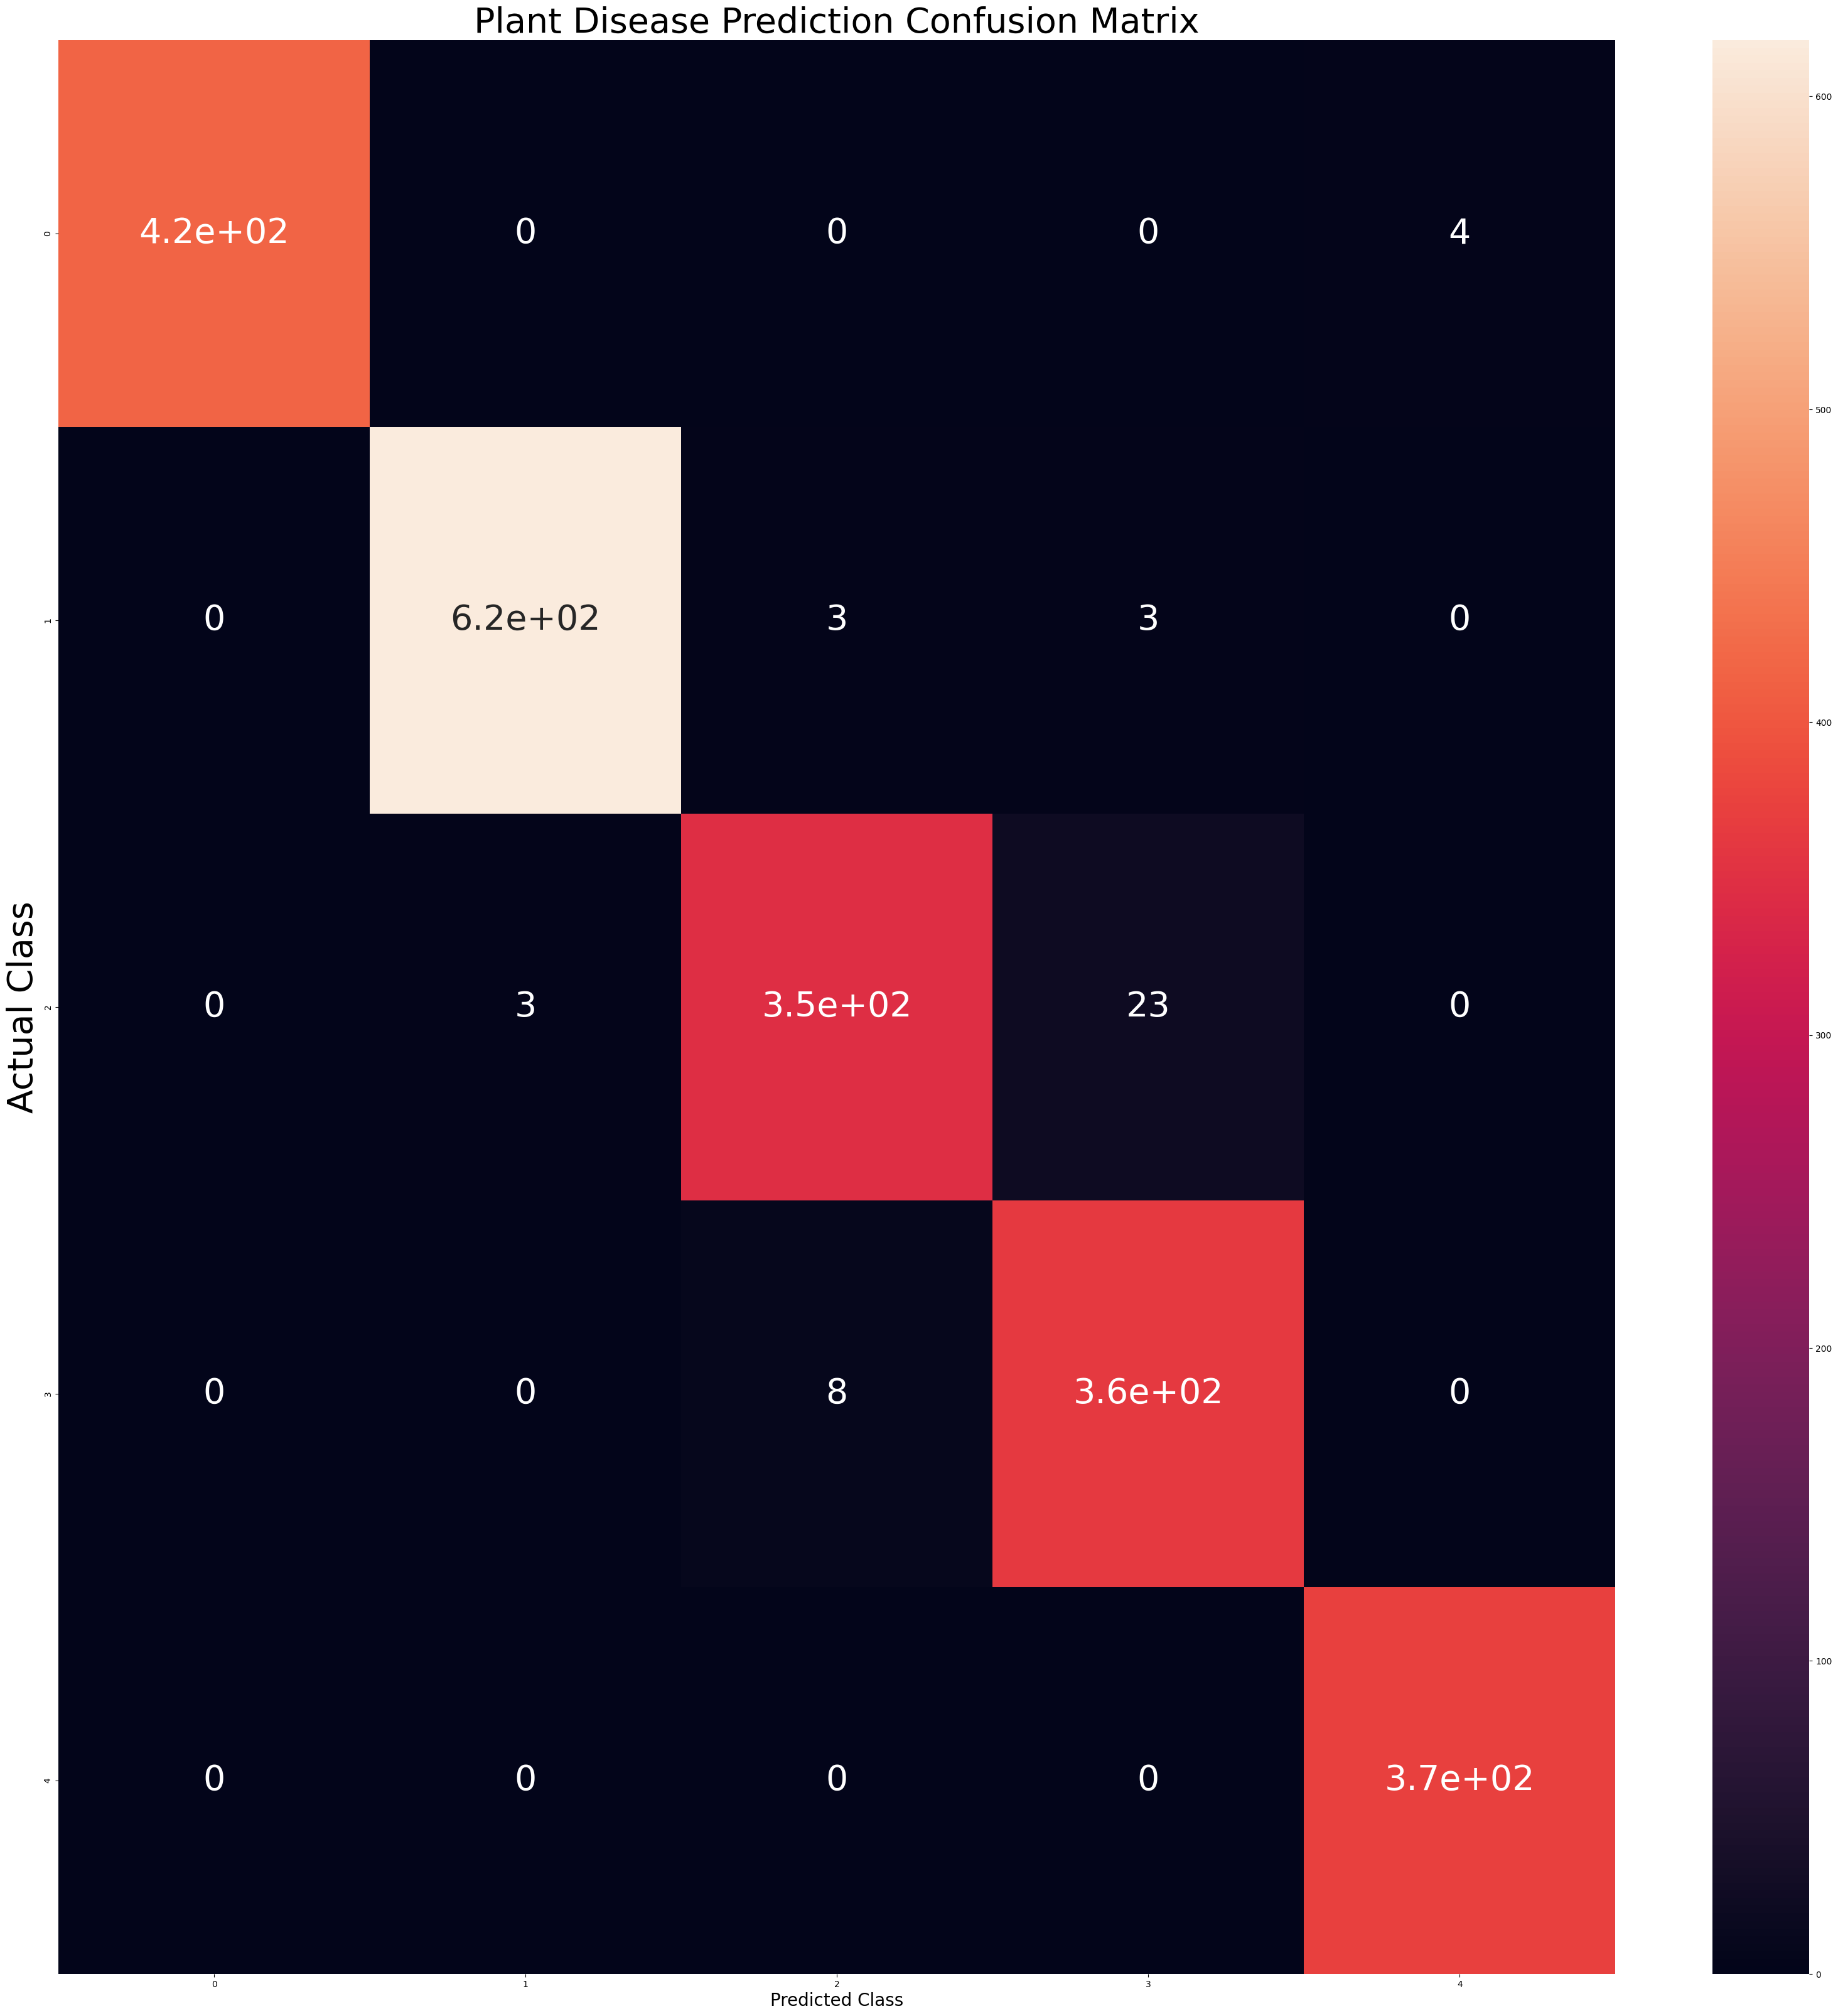

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 40)
plt.show()